<a href="https://colab.research.google.com/github/zademayuri/zademayuri/blob/main/Hand_Written_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
mnist = tf.keras.datasets.mnist


In [ ]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [ ]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


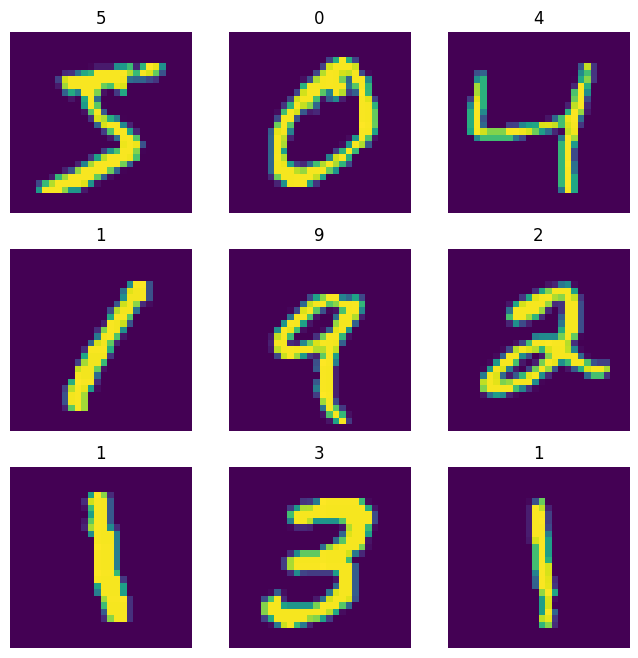

In [ ]:
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i])
  plt.title(y_train[i])
  plt.axis('off')

In [ ]:
x_train = tf.keras.utils.normalize(x_train, axis =0)
x_test = tf.keras.utils.normalize(x_test, axis =0)

Building Model

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28,28)))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(32, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics =['accuracy'])

In [ ]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs = 15)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 12s 5ms/step - loss: 0.6154 - accuracy: 0.8080 - val_loss: 0.5463 - val_accuracy: 0.8681
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2672 - accuracy: 0.9198 - val_loss: 0.3397 - val_accuracy: 0.9202
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1934 - accuracy: 0.9427 - val_loss: 0.2964 - val_accuracy: 0.9297
Epoch 4/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1515 - accuracy: 0.9535 - val_loss: 0.2291 - val_accuracy: 0.9492
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1210 - accuracy: 0.9633 - val_loss: 0.2107 - val_accuracy: 0.9545
Epoch 6/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0999 - accuracy: 0.9687 - val_loss: 0.2077 - val_accuracy: 0.9568
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0830 - accuracy: 0.9742 - val_loss: 0.1834 - val_accuracy: 0.96

In [ ]:
import cv2

In [ ]:
image = cv2.imread('3.png')[:,:,0]
image = np.invert(np.array([image]))

1/1 [==============================] - 0s 21ms/step
3


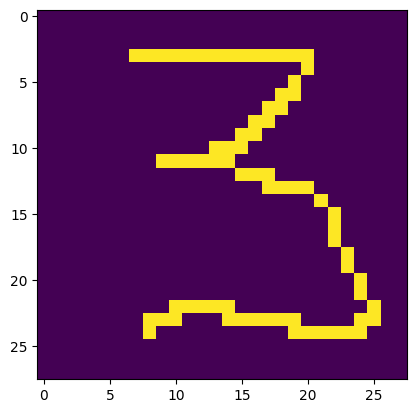

In [ ]:
output = model.predict(image)
plt.imshow(image[0])
print(np.argmax(output))

In [ ]:
model.save('/content/hand_written_Digit_recog_model.keras')

In [ ]:
!pip install streamlit

In [ ]:
!streamlit run /content/app.py &> /content/logs.txt &

In [ ]:
!npx localtunnel --port 8501

npx: installed 22 in 4.311s
your url is: https://public-tables-melt.loca.lt
